In [165]:
%matplotlib inline
import sys
sys.path.append('../fitting')
sys.path.append('../visualising')
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import pandas as pd
import numpy as np
import astropy.units as u
import astropy.constants as const

from heliopy.data import helios

import vis_helpers as helpers
from helpers import mplhelp
from helpers import helioshelp
from plot_fitted_dist_alphas import plot_dist_time

In [154]:
# Set probe and dates to compare here
probe = '2'
starttime = datetime(1976, 1, 17)
endtime = starttime + timedelta(days=100)

merged = helios.merged(probe, starttime, endtime)
alphas = helpers.load_alphafit(probe, starttime, endtime)
protons = helios.corefit(probe, starttime, endtime, try_download=False)

1976 17
1976 18
1976 19
1976 20
1976 21
1976 22
1976 23
1976 24
1976 25
1976 26
1976 27
1976 28
1976 29
1976 30
1976 31
1976 32
1976 33
1976 34
1976 35
1976 36
1976 37
1976 38
1976 39
1976 40
1976 41
1976 42
1976 43
1976 44
1976 45
1976 46
1976 47
1976 48
1976 49
1976 50
1976 51
1976 52
1976 53
1976 54
1976 55
1976 56
1976 57
1976 58
1976 59
1976 60
1976 61
1976 62
1976 63
1976 64
1976 65
1976 66
1976 67
1976 68
1976 69
1976 70
1976 71
1976 72
1976 73
1976 74
1976 75
1976 76
1976 77
1976 78
1976 79
1976 80
1976 81
1976 82
1976 83
1976 84
1976 85
1976 86
1976 87
1976 88
1976 89
1976 90
1976 91
1976 92
1976 93
1976 94
1976 95
1976 96
1976 97


100.0% 901120 / 895933




1976 98 Processed ascii file


100.0% 720896 / 715597




1976 99 Processed ascii file


100.0% 794624 / 788085




1976 100 Processed ascii file


100.0% 827392 / 820351




1976 101 Processed ascii file


100.0% 835584 / 835379




1976 102 Processed ascii file


100.0% 884736 / 876927




1976 103 Processed ascii file


100.0% 819200 / 816373




1976 104 Processed ascii file


100.0% 884736 / 876927




1976 105 Processed ascii file


100.0% 811008 / 803113




1976 106 Processed ascii file


100.0% 909312 / 903005




1976 107 Processed ascii file


KeyError: 'No object named table in the file'

In [155]:
protons = protons.reindex(alphas.index)
protons = helioshelp.calculate_derived(protons)

alphas[['Bx', 'By', 'Bz', '|B|']] = protons[['Bx', 'By', 'Bz', '|B|']]
alphas['Beta_par'] = alphas['Ta_par'] * const.k_B.value * alphas['n_a'] * 1e6 / (alphas['|B|']**2 * 1e-18 / (2 * const.mu0))
alphas['Tani'] = alphas['Ta_perp'] / alphas['Ta_par']

New keys:
 Index(['B instrument', 'Bx', 'By', 'Bz', 'sigma B', 'Ion instrument', 'Status',
       'Tp_par', 'Tp_perp', 'carrot', 'r_sun', 'clat', 'clong',
       'earth_he_angle', 'n_p', 'vp_x', 'vp_y', 'vp_z', 'vth_p_par',
       'vth_p_perp', '|B|', '|v|', 'Tp_tot', 'p_mag', 'p_th_par', 'p_th_tot',
       'Beta', 'Beta_tot', 'Tani', 'n_p_norm', 'mass_flux', 'Entropy', 'va_x',
       'va_y', 'va_z', '|va|'],
      dtype='object')


In [156]:
merged.keys()

Index(['rh', 'esh', 'clong', 'clat', 'HGIlong', 'br', 'bt', 'bn', 'vp1r',
       'vp1t', 'vp1n', 'crot', 'np1', 'vp1', 'Tp1', 'vaz', 'vel', 'Bx', 'By',
       'Bz', 'sBx', 'sBy', 'sBz', 'nal', 'val', 'Tal', 'np2', 'vp2'],
      dtype='object')

Reprodcue Marsch et al. 1982b Figure 1
---

(721370.0709606481, 721449.9995949074)

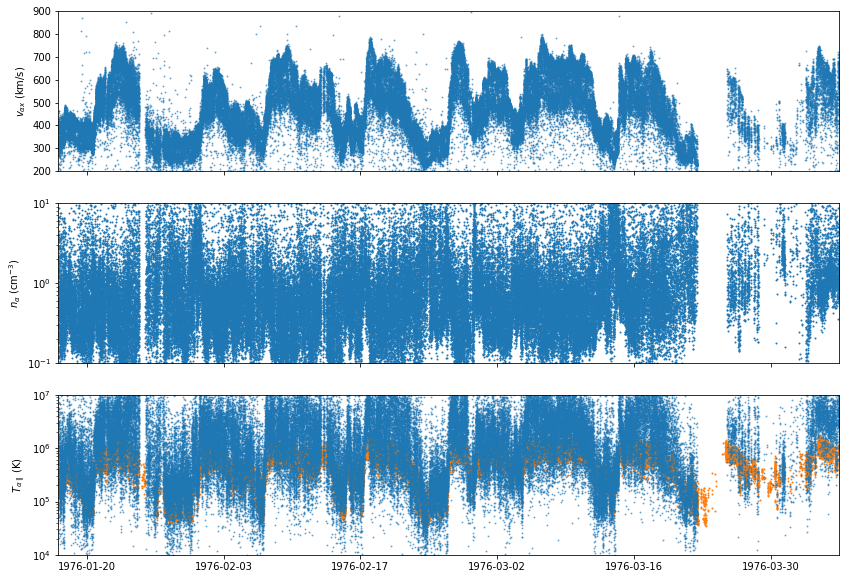

In [157]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(14, 10))

ax = axs[0]
ax.scatter(alphas.index, alphas['va_x'], s=1, alpha=0.5)
ax.set_ylim(200, 900)
ax.set_ylabel(r'$v_{\alpha x}$ (km/s)')

ax = axs[1]
ax.scatter(alphas.index, alphas['n_a'], s=1)
ax.set_yscale('log')
ax.set_ylim(1e-1, 1e1)
ax.set_ylabel(r'$n_{\alpha}$ (cm$^{-3}$)')

ax = axs[2]
ax.scatter(merged.index, merged['Tal'], s=1, c='C1')
ax.scatter(alphas.index, alphas['Ta_par'], s=1, alpha=0.5)

ax.set_yscale('log')
ax.set_ylim(1e4, 1e7)
ax.set_ylabel(r'$T_{\alpha \parallel}$ (K)')
ax.set_xlim(alphas.index.min(), alphas.index.max())

Extend previous figure
---

(721370.0709606481, 721449.9995949074)

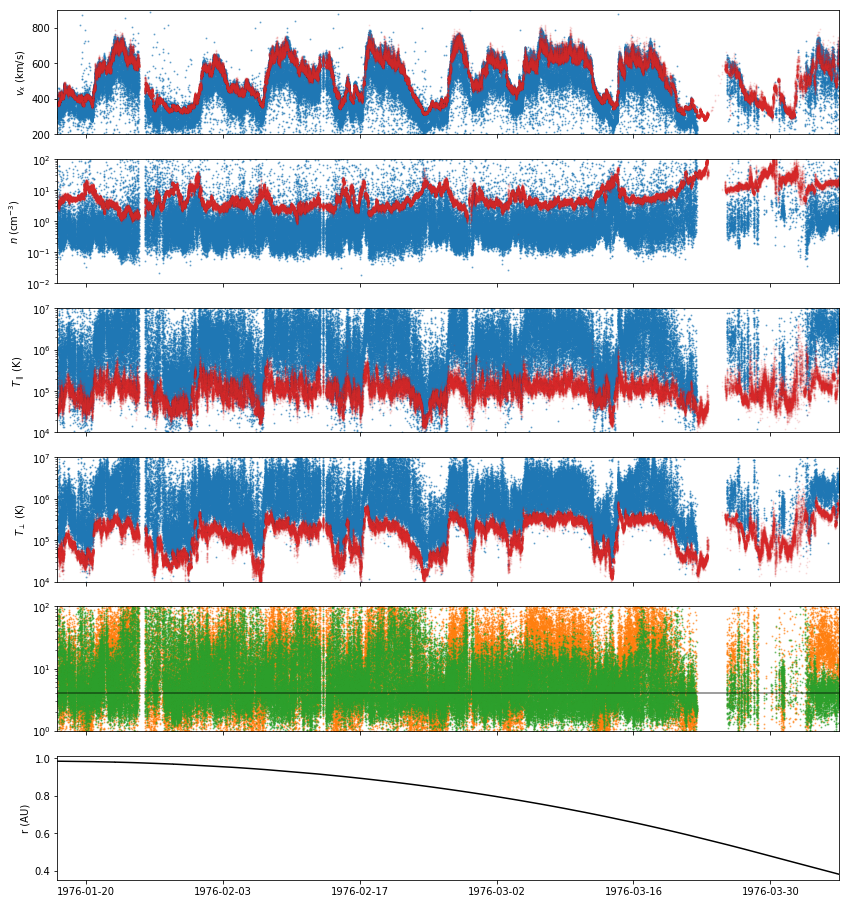

In [166]:
akwargs = {'alpha': 0.5, 'color': 'C0', 's': 1}
pkwargs = {'alpha': 0.1, 'color': 'C3', 's': 1}
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(14, 16))

ax = axs[0]
ax.scatter(alphas.index, alphas['va_x'], **akwargs)
ax.scatter(protons.index, protons['vp_x'], **pkwargs)
ax.set_ylim(200, 900)
ax.set_ylabel(r'$v_{x}$ (km/s)')

ax = axs[1]
ax.scatter(alphas.index, alphas['n_a'], **akwargs)
ax.scatter(protons.index, protons['n_p'], **pkwargs)
ax.set_yscale('log')
ax.set_ylim(1e-2, 1e2)
ax.set_ylabel(r'$n$ (cm$^{-3}$)')

ax = axs[2]
ax.scatter(alphas.index, alphas['Ta_par'], **akwargs)
ax.scatter(protons.index, protons['Tp_par'], **pkwargs)
ax.set_yscale('log')
ax.set_ylim(1e4, 1e7)
ax.set_ylabel(r'$T_{\parallel}$ (K)')

ax = axs[3]
ax.scatter(alphas.index, alphas['Ta_perp'], **akwargs)
ax.scatter(protons.index, protons['Tp_perp'], **pkwargs)
ax.set_yscale('log')
ax.set_ylim(1e4, 1e7)
ax.set_ylabel(r'$T_{\perp}$ (K)')

ax = axs[4]
ax.scatter(alphas.index, alphas['Ta_par'] / protons['Tp_par'], s=1, color='C1', alpha=0.5)
ax.scatter(alphas.index, alphas['Ta_perp'] / protons['Tp_perp'], s=1, color='C2', alpha=0.5)

ax.set_yscale('log')
ax.set_ylim(1e0, 1e2)
ax.axhline(4, color='k', alpha=0.5)
# ax.set_ylabel(r'$T_{\alpha \perp}$')

ax = axs[5]
ax.plot(protons['r_sun'], color='k')
ax.set_ylabel('r (AU)')

ax.set_xlim(alphas.index.min(), alphas.index.max())